### Dataset Description
I will analyze "New York City Airbnb Open Data" on Kaggle. The data file provides comprehensive information about the Airbnb data in New York City. The data includes information about host information, location, minimum days to stay, number of reviews, etc. Here is the website to download data: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data.

I will mainly answer these three questions:
* What are the busiest Airbnb locations in New York City?
* Will the level of busyness effect the price?
* Is there a linear relationship between the price and the number of reviews so that hosts might be able to have more reviews by applying discounts on the price? 

### Data Extraction

In [180]:
import pandas as pd
import numpy as np

In [181]:
df = pd.read_csv('/Users/jiameimeng/ABNYC2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [183]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Data Cleanup

In [184]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [185]:
df['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [186]:
df['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [187]:
(df['last_review'].isnull()==df['reviews_per_month'].isnull()).all()

True

Although I planned to deal with the missing values in the "last review" and "reviews_per_month" simoltaneously, it's irrational to assign values to missing dates for the "last_review", and I will leave them black. For missing values in "review_per_month", if it exists great outliers, I will assign the median for the missing values. On the other hand, I will fill the missing ones with mean value. 

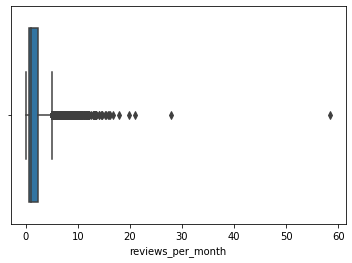

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = df['reviews_per_month'])

Since great outliers exist in "reviews_per_month", I will fill missing values with median. 

In [189]:
df.loc[df['reviews_per_month'].isnull(), 'reviews_per_month'] = df['reviews_per_month'].median()

In [190]:
df['reviews_per_month']

0        0.21
1        0.38
2        0.72
3        4.64
4        0.10
         ... 
48890    0.72
48891    0.72
48892    0.72
48893    0.72
48894    0.72
Name: reviews_per_month, Length: 48895, dtype: float64

Once I got back to the data frame, I found that the minimum price is 0, which doesn't make sense, and I will remove the data where price equals 0. Meanwhile, the minimum available days for booking is 0 as well. Since I will focus on the analysis of hosts who open for booking, I will delete the zero values of "availability_365" as well. 

In [191]:
df.drop(['name', 'host_name', 'last_review'], axis = 1, inplace = True)

In [192]:
df = df[df['price'] >0]
df = df[df['availability_365'] >0]

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 0 to 48894
Data columns (total 13 columns):
id                                31354 non-null int64
host_id                           31354 non-null int64
neighbourhood_group               31354 non-null object
neighbourhood                     31354 non-null object
latitude                          31354 non-null float64
longitude                         31354 non-null float64
room_type                         31354 non-null object
price                             31354 non-null int64
minimum_nights                    31354 non-null int64
number_of_reviews                 31354 non-null int64
reviews_per_month                 31354 non-null float64
calculated_host_listings_count    31354 non-null int64
availability_365                  31354 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 3.3+ MB


### Data Analysis
#### The level of busyness of Airbnb location in New York.

In [194]:
print("neighbourhood_group:", df['neighbourhood_group'].unique())

neighbourhood_group: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


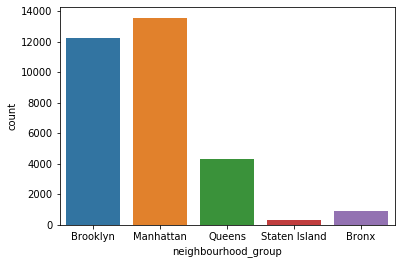

In [195]:
sns.countplot(x = 'neighbourhood_group', data = df)

In [196]:
areadata = df.groupby(['neighbourhood_group','neighbourhood']).neighbourhood.value_counts().nlargest(5)
print(areadata)

neighbourhood_group  neighbourhood       neighbourhood     
Brooklyn             Bedford-Stuyvesant  Bedford-Stuyvesant    2478
                     Williamsburg        Williamsburg          2051
Manhattan            Harlem              Harlem                1734
Brooklyn             Bushwick            Bushwick              1447
Manhattan            Hell's Kitchen      Hell's Kitchen        1446
Name: neighbourhood, dtype: int64


From the analysis above, we can find that the busiest locations of New York are Brooklyn and Manhattan. In these two neighbourhoods, the busiest areas are Bedford-Stuyvesant, Williamsburg, Harlem, Bushwick, and Hell's Kitchen. 

#### Relationship between location, price, and the number of reviews. 

In [197]:
df['price'].groupby(df['neighbourhood_group']).describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,913.0,89.105148,112.676761,10.0,45.0,67.0,100.0,2500.0
Brooklyn,12253.0,132.928262,189.038301,10.0,64.0,99.0,150.0,8000.0
Manhattan,13559.0,214.202080,325.029426,10.0,99.0,151.0,240.0,10000.0
Queens,4298.0,100.029781,108.584467,10.0,50.0,75.0,115.0,2600.0
Staten Island,331.0,114.229607,291.526508,13.0,50.0,75.0,107.5,5000.0


In [198]:
areaprice = df.groupby(['neighbourhood_group','neighbourhood']).price.mean().nlargest(10)
print(areaprice)

neighbourhood_group  neighbourhood    
Staten Island        Fort Wadsworth       800.000000
Brooklyn             Sea Gate             569.666667
Bronx                Riverdale            567.250000
Manhattan            Tribeca              561.462810
                     Battery Park City    511.882353
Staten Island        Prince's Bay         484.333333
Manhattan            Flatiron District    381.571429
Staten Island        Randall Manor        336.000000
Manhattan            NoHo                 331.490566
                     SoHo                 319.401639
Name: price, dtype: float64


For locations, the busiest locations, which are Brooklyn and Manhattan, secure the highest mean price. However, for specific areas, three areas of Staten Island are in the list of top 10 highest mean price. The findings tell us that the level of busyness may effect the price, but it's not the only factor for the price. 

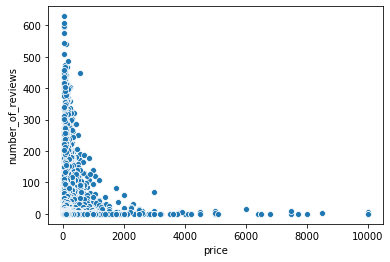

In [199]:
sns.scatterplot('price', 'number_of_reviews', data = df)

The outliers largely effect the relationship between price and the number of reviews and I will remove the outliers in these two columns to test whether there is a relationship between number_of_reviews and the price. 

In [208]:
def rm_outlier(df_in, column):
    q1 = df_in[column].quantile(0.25)
    q3 = df_in[column].quantile(0.75)
    iqr = q3-q1
    lower  = q1-1.5*iqr
    upper = q3+1.5*iqr
    df_out = df_in.loc[(df_in[column] > lower) & (df_in[column] < upper)]
    return df_out

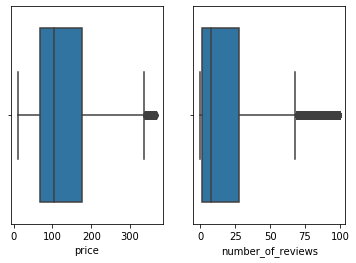

In [211]:
df_update = rm_outlier(df, 'price')
df_update = rm_outlier(df_update, 'number_of_reviews')
plt.subplot(1, 2, 1)
sns.boxplot(x = 'price', data = df_update)
plt.subplot(1, 2, 2)
sns.boxplot(x = 'number_of_reviews', data = df_update)

In [173]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
relationship_pn = smf.ols('number_of_reviews ~ price', data = df_update).fit()
relationship_pn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      number_of_reviews   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     144.2
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           3.85e-33
Time:                        13:27:13   Log-Likelihood:            -1.2253e+05
No. Observations:               26670   AIC:                         2.451e+05
Df Residuals:                   26668   BIC:                         2.451e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.9420      0.286     76.710      0.000      21.381      22.503
price         -0.0232      0.002    -12.010      0.000      -0.027      -0.019
==============================================================================
Omnibus:                     6360.859   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12174.085
Skew:                           1.501   Prob(JB):                         0.00
Kurtosis:                       4.395   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since R-squared is pretty close to 0, which is 0.005. We can't set a linear regression model for the price and the number of reviews. Previously, I thought that maybe as price goes up, the number of reviews will decrease since fewer people will be able to afford the price. The result of the predictive analysis tells me I'm wrong. For hosts, they can't expect more reviews by reducing the price. 

### Conclusion

From the above analysis, the busiest Airbnb locations in New York are Brooklyn and Mahattan. In these two neighbourhoods, the top 3 busiest areas are Bedford-Stuyvesant, Williamsburg, and Harlem. 
When we take a look at the price in different areas, three areas of Staten Island are in the list of top 10 highest mean price. The findings tell us that the level of busyness may effect the price, but it's not the only factor for the price. Meanwhile, as the Staten Island has retaltively high price, the average quality of the living environment might be better than other places. 
Last but not least, there isn't a linear relationship between the price and the number of reviews and the hosts can't expect more reviews by reducing the price. 